# NumPy Tutorial

https://www.w3schools.com/python/numpy/

## Binomial Distribution

Binomial distributions are a family of distributions that describe events that can have only one of two states. For example, a light can be off or on, or a flipped coin can be heads or tales.

This is a **discrete distribution** since it is a distribution that arises from observing discrete states. Compare this to a **continuous distribution** such as the normal distribution, where observations can take on any value.

Use `random.binomial()` to get a binomial distribution. Specify these three parameters:
- `n` = number of trials
- `p` = the probability of occurence of each trial
- `size` = the shape of the returned array

The outcome of a single trial will be 0 or 1. If there are multiple trials, then the value returned for a single element in the output array will be the sum of the outcomes (i.e., if there are 10 trials and all 10 result in a positive outcome, the result will be 10; if there are 10 trials and 50% of them are positive outcomes, the result will be 5).

In [4]:
import numpy as np
from configurations import printer

binomial_1_trial = np.random.binomial(n=1, p=0.5, size=10)
printer('This is a 1-trial binomial distribution:\n%s',
        binomial_1_trial)

binomial_10_trials = np.random.binomial(n=10, p=0.5, size=10)
printer('This is a 10-trial binomial distribution:\n%s',
        binomial_10_trials)

binomial_100_trials = np.random.binomial(n=100, p=0.5, size=10)
printer('This is a 100-trial binomial distribution:\n%s',
        binomial_100_trials)

This is a 1-trial binomial distribution:
[0 1 1 1 0 0 1 0 1 1]
This is a 10-trial binomial distribution:
[6 4 6 9 8 6 8 5 7 3]
This is a 100-trial binomial distribution:
[51 49 54 44 46 46 38 58 42 43]


### Visualization of Binomial distribution


2023-08-21 14:51:11 
	Logger: numpy-tutorial Module: 3330739216 Function: <module> File: 3330739216.py Line: 8
Seaborn does not seem to export a stub to help linters with type hints
so I am explicitly disabling type hints on those lines.


2023-08-21 14:51:11 
	Logger: numpy-tutorial Module: 3330739216 Function: <module> File: 3330739216.py Line: 13
Matplotlib.pylot does not seem to have types set up for linters.
So I am explicitly disabling type hints on those lines.


2023-08-21 14:51:12 
	Logger: numpy-tutorial Module: 3330739216 Function: <module> File: 3330739216.py Line: 45
The kernel density plot is misleading; it shows small dips between the
discrete values, but the probability of values between those values is
0. Thus, although there are really dips in those areas, the dips should
go to 0. A more accurate depiction can be made by modifying the
bandwidth of the kernel-density estimate (KDE).



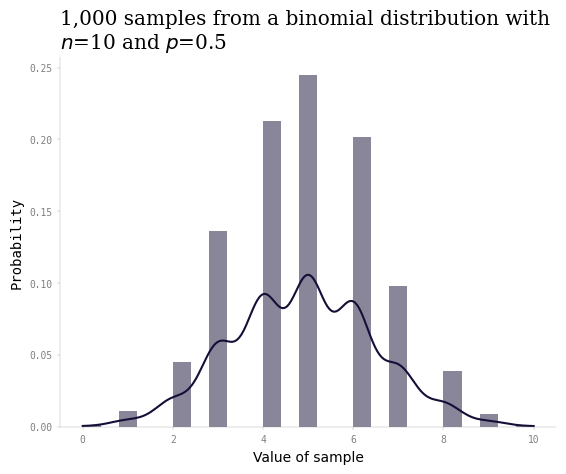

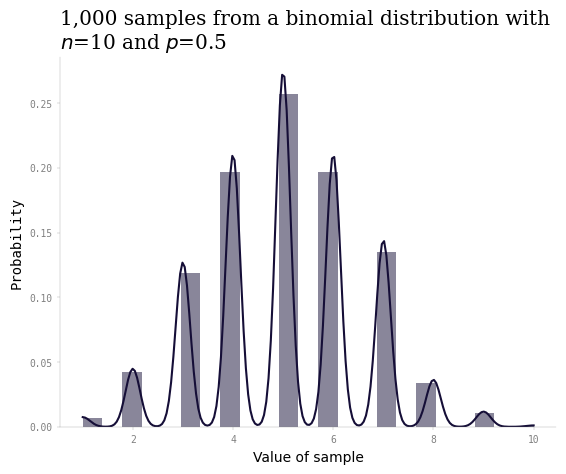

In [20]:
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
from configurations import logger

plt.style.use('my_mpl_stylesheet.mpltstyle')

logger.warning(
    'Seaborn does not seem to export a stub to help linters with type hints\n'
    'so I am explicitly disabling type hints on those lines.'
)

logger.warning(
    'Matplotlib.pylot does not seem to have types set up for linters.\n'
    'So I am explicitly disabling type hints on those lines.'
)

def plot_binomial(
        n: int = 10,
        p: float = 0.5,
        size: int = 1_000,
        bw_adjust: float = 1
        ) -> None:
    my_binomial = np.random.binomial(n=n, p=p, size=size)

    sns.histplot( # type: ignore
        my_binomial,
        ax=plt.subplots()[1], # type: ignore
        stat='probability',
        kde=True,
        kde_kws={'bw_adjust' : bw_adjust},
        edgecolor='None'
        )

    plt.title( # type: ignore
        label=f'{size:,} samples from a binomial distribution with\n'
        fr'$n$={n:,} and $p$={p}',
        family='serif'
        )

    plt.xlabel(xlabel='Value of sample', family='sans-serif') #type: ignore
    
plot_binomial(size=1_000)

logger.warning(
    'The kernel density plot is misleading; it shows small dips between the\n'
    'discrete values, but the probability of values between those values is\n'
    '0. Thus, although there are really dips in those areas, the dips should\n'
    'go to 0. A more accurate depiction can be made by modifying the\n'
    'bandwidth of the kernel-density estimate (KDE).'
)

plot_binomial(size=1_000, bw_adjust=0.375)

Observe how using more samples makes the plot look more like the underlying distribution.


2023-08-21 08:14:47 
	Logger: numpy-tutorial Module: 2219996156 Function: <module> File: 2219996156.py Line: 8
Seaborn does not seem to export a stub to help linters with type hints
so I am explicitly disabling type hints on those lines.


2023-08-21 08:14:47 
	Logger: numpy-tutorial Module: 2219996156 Function: <module> File: 2219996156.py Line: 13
Matplotlib.pylot does not seem to have types set up for linters.
So I am explicitly disabling type hints on those lines.



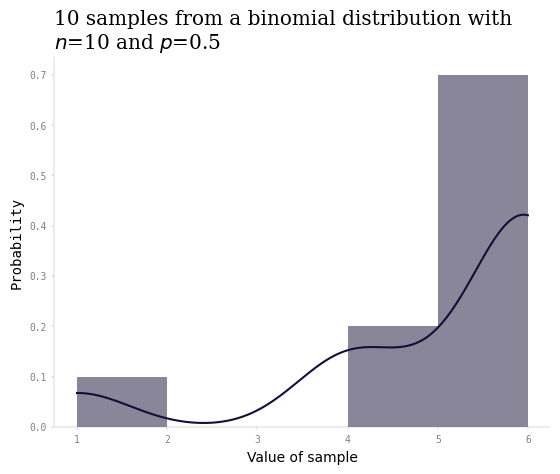

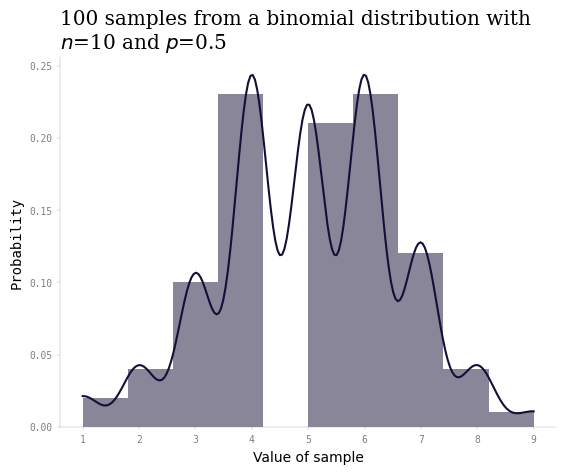

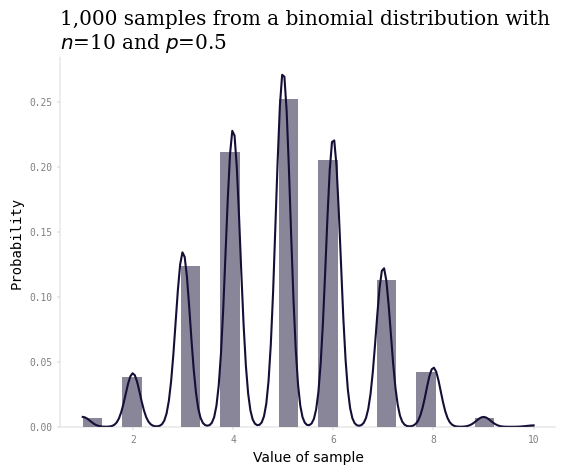

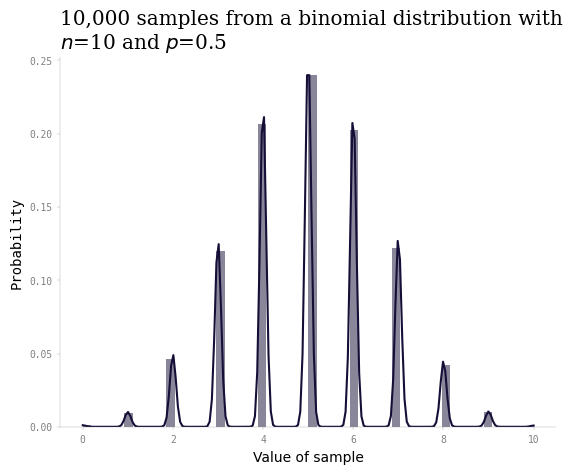

In [16]:
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
from configurations import logger

plt.style.use('my_mpl_stylesheet.mpltstyle')

logger.warning(
    'Seaborn does not seem to export a stub to help linters with type hints\n'
    'so I am explicitly disabling type hints on those lines.'
)

logger.warning(
    'Matplotlib.pylot does not seem to have types set up for linters.\n'
    'So I am explicitly disabling type hints on those lines.'
)

def plot_binomial(
        n: int = 10,
        p: float = 0.5,
        size: int = 1_000,
        bw_adjust: float = 0.375
        ) -> None:
    my_binomial = np.random.binomial(n=n, p=p, size=size)

    sns.histplot( # type: ignore
        my_binomial,
        ax=plt.subplots()[1], # type: ignore
        stat='probability',
        kde=True,
        kde_kws={'bw_adjust' : bw_adjust},
        edgecolor='None'
        )

    plt.title( # type: ignore
        label=f'{size:,} samples from a binomial distribution with\n'
        fr'$n$={n:,} and $p$={p}',
        family='serif'
        )

    plt.xlabel(xlabel='Value of sample', family='sans-serif') #type: ignore
    
sizes_bandwidths_to_cycle_through = {
    10 : 0.575,
    100 : 0.475,
    1_000 : 0.375,
    10_000 : 0.275
    }

for size in sizes_bandwidths_to_cycle_through:
    plot_binomial(size=size, bw_adjust=sizes_bandwidths_to_cycle_through[size])

Observe that a binomial distribution can be approximated by a normal distribution where:

$\mu=n * p$

and

$\sigma=\sqrt{n * p * (1 - p)}$


2023-08-21 14:52:57 
	Logger: numpy-tutorial Module: 3354985761 Function: <module> File: 3354985761.py Line: 8
Seaborn does not seem to export a stub to help linters with type hints
so I am explicitly disabling type hints on those lines.


2023-08-21 14:52:57 
	Logger: numpy-tutorial Module: 3354985761 Function: <module> File: 3354985761.py Line: 13
Matplotlib.pylot does not seem to have types set up for linters.
So I am explicitly disabling type hints on those lines.



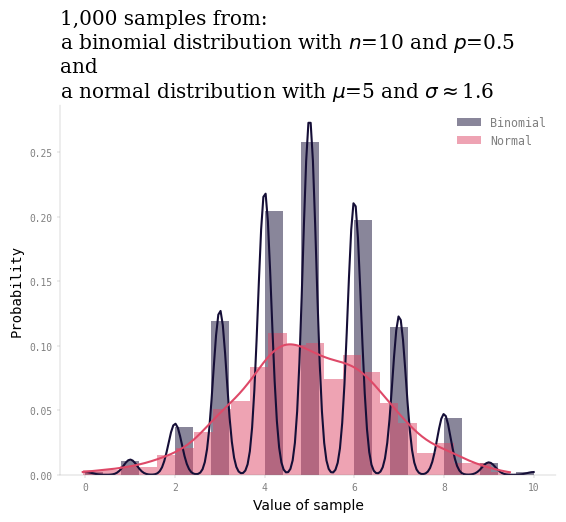

In [22]:
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
from configurations import logger

plt.style.use('my_mpl_stylesheet.mpltstyle')

logger.warning(
    'Seaborn does not seem to export a stub to help linters with type hints\n'
    'so I am explicitly disabling type hints on those lines.'
)

logger.warning(
    'Matplotlib.pylot does not seem to have types set up for linters.\n'
    'So I am explicitly disabling type hints on those lines.'
)

def choose_my_color(integer: int = 0) -> str:
    return (plt.rcParams["axes.prop_cycle"] # type: ignore
            .by_key()["color"][integer])

def plot_binomial_and_normal(
        n: int = 10,
        p: float = 0.5,
        size: int = 1_000,
        bw_adjust: float = 1
        ) -> None:
    my_binomial = np.random.binomial(n=n, p=p, size=size)

    ax = plt.subplots()[1] #type: ignore

    sns.histplot( # type: ignore
        my_binomial,
        ax=ax,
        stat='probability',
        kde=True,
        kde_kws={'bw_adjust' : bw_adjust},
        edgecolor='None',
        color=choose_my_color(0),
        label='Binomial'
        )

    loc = n * p
    scale = np.sqrt(n * p * (1 - p))

    my_normal = np.random.normal(loc=loc, scale=scale, size=size)

    sns.histplot( # type: ignore
        my_normal,
        ax=ax,
        stat='probability',
        kde=True,
        edgecolor='None',
        color=choose_my_color(5),
        label='Normal'
        )
    
    ax.legend() # type: ignore

    plt.title( # type: ignore
        label=f'{size:,} samples from:\n'
        'a binomial distribution with '
        fr'$n$={n:,} and $p$={p}'
        '\nand\n'
        'a normal distribution with '
        fr'$\mu$={loc:,.0f} and $\sigma\approx${scale:.1f}',
        family='serif'
        )

    plt.xlabel(xlabel='Value of sample', family='sans-serif') #type: ignore

plot_binomial_and_normal(size=1_000, bw_adjust=0.375)

The normal distribution better approximates the binomial distribution with more trials, since the gaps between the discrete values become less relevant for the overall distribution. Nonetheless, one should keep in mind that the binomial distribution is discrete and thus only integer values can be taken on, so kernel-density estimates that do not drop to zero between integers are misleading.


2023-08-21 14:54:02 
	Logger: numpy-tutorial Module: 1406433389 Function: <module> File: 1406433389.py Line: 8
Seaborn does not seem to export a stub to help linters with type hints
so I am explicitly disabling type hints on those lines.


2023-08-21 14:54:02 
	Logger: numpy-tutorial Module: 1406433389 Function: <module> File: 1406433389.py Line: 13
Matplotlib.pylot does not seem to have types set up for linters.
So I am explicitly disabling type hints on those lines.



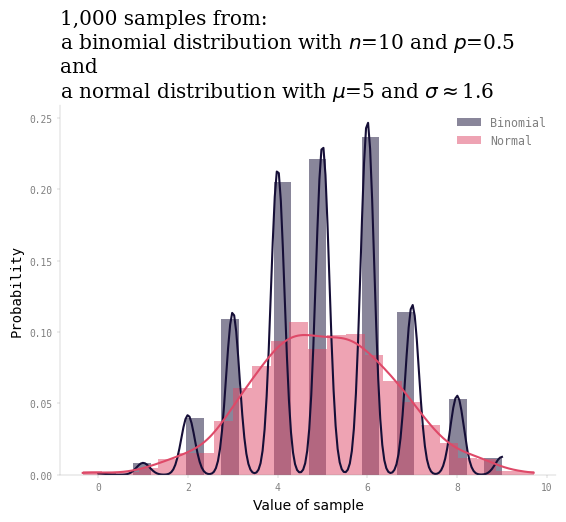

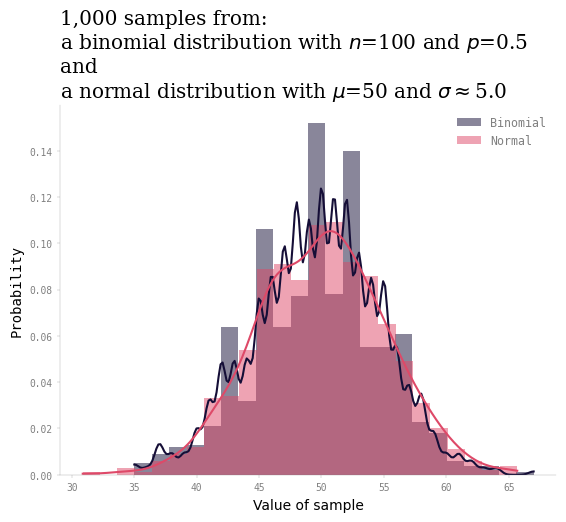

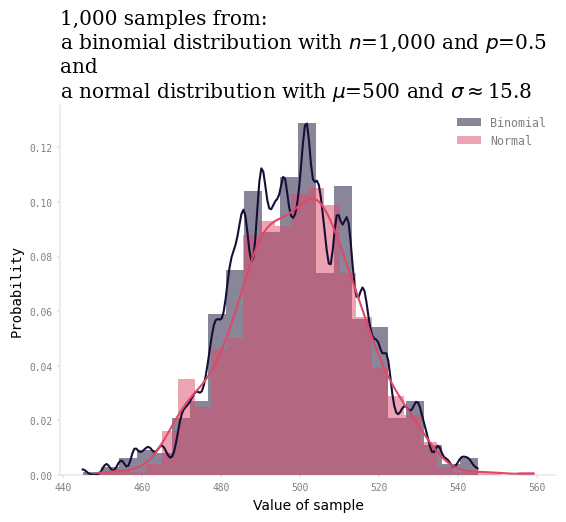

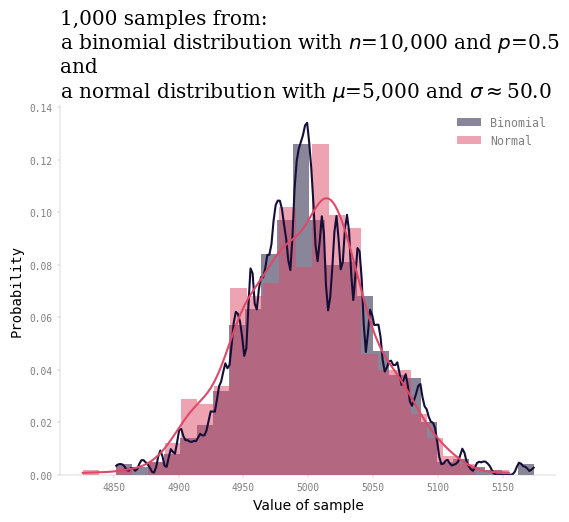

In [23]:
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
from configurations import logger

plt.style.use('my_mpl_stylesheet.mpltstyle')

logger.warning(
    'Seaborn does not seem to export a stub to help linters with type hints\n'
    'so I am explicitly disabling type hints on those lines.'
)

logger.warning(
    'Matplotlib.pylot does not seem to have types set up for linters.\n'
    'So I am explicitly disabling type hints on those lines.'
)

def choose_my_color(integer: int = 0) -> str:
    return (plt.rcParams["axes.prop_cycle"] # type: ignore
            .by_key()["color"][integer])

def plot_binomial_and_normal(
        n: int = 10,
        p: float = 0.5,
        size: int = 1_000,
        bw_adjust: float = 1
        ) -> None:
    my_binomial = np.random.binomial(n=n, p=p, size=size)

    ax = plt.subplots()[1] #type: ignore

    sns.histplot( # type: ignore
        my_binomial,
        ax=ax,
        stat='probability',
        kde=True,
        kde_kws={'bw_adjust' : bw_adjust},
        edgecolor='None',
        color=choose_my_color(0),
        label='Binomial'
        )

    loc = n * p
    scale = np.sqrt(n * p * (1 - p))

    my_normal = np.random.normal(loc=loc, scale=scale, size=size)

    sns.histplot( # type: ignore
        my_normal,
        ax=ax,
        stat='probability',
        kde=True,
        edgecolor='None',
        color=choose_my_color(5),
        label='Normal'
        )
    
    ax.legend() # type: ignore

    plt.title( # type: ignore
        label=f'{size:,} samples from:\n'
        'a binomial distribution with '
        fr'$n$={n:,} and $p$={p}'
        '\nand\n'
        'a normal distribution with '
        fr'$\mu$={loc:,.0f} and $\sigma\approx${scale:.1f}',
        family='serif'
        )

    plt.xlabel(xlabel='Value of sample', family='sans-serif') #type: ignore

trials_bandwidths_to_cycle_through = {
    10 : 0.375,
    100 : 0.300,
    1_000 : 0.225,
    10_000 : 0.150
    }

for trial in trials_bandwidths_to_cycle_through:
    plot_binomial_and_normal(
        n=trial,
        bw_adjust=trials_bandwidths_to_cycle_through[trial]
        )

Observe how modifying the probability skews the distribution.

This is most obvious with lower trial numbers, since once there are many trials, the distributions all look approximately normal, although they still clearly 'shift right' as the probability of a successful trial grows (examine the difference in x-axis scales as the probability increases from 0.1 to 0.9).


2023-08-21 15:08:54 
	Logger: numpy-tutorial Module: 3840539609 Function: <module> File: 3840539609.py Line: 8
Seaborn does not seem to export a stub to help linters with type hints
so I am explicitly disabling type hints on those lines.


2023-08-21 15:08:54 
	Logger: numpy-tutorial Module: 3840539609 Function: <module> File: 3840539609.py Line: 13
Matplotlib.pylot does not seem to have types set up for linters.
So I am explicitly disabling type hints on those lines.



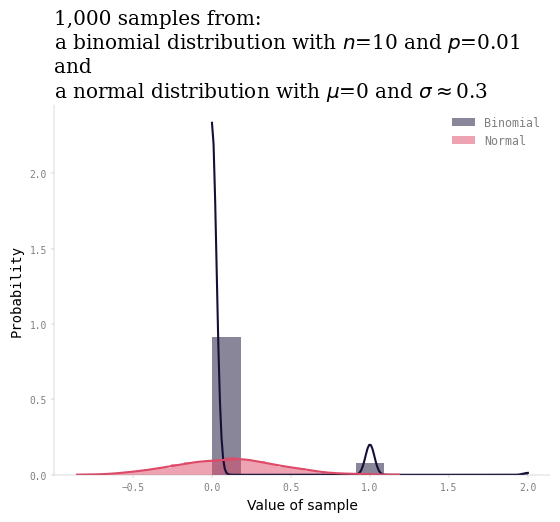

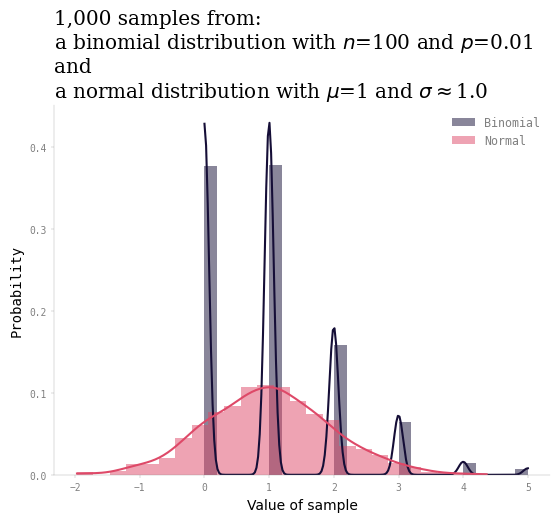

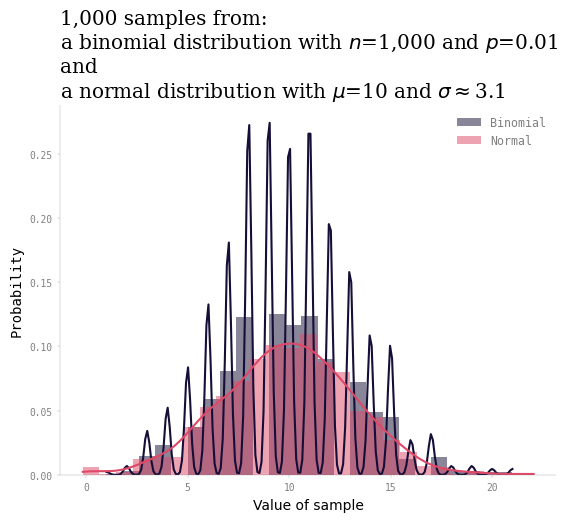

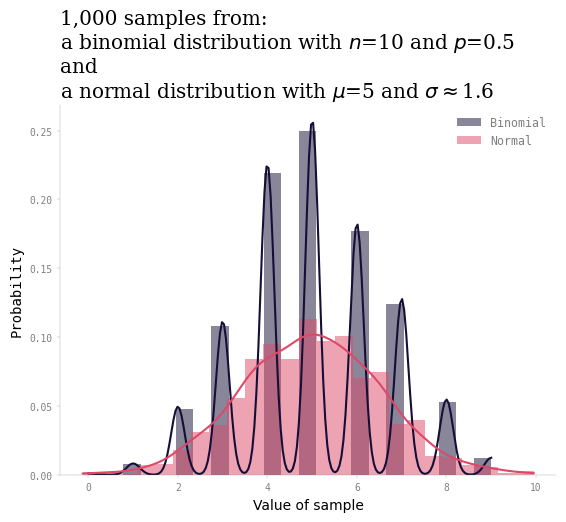

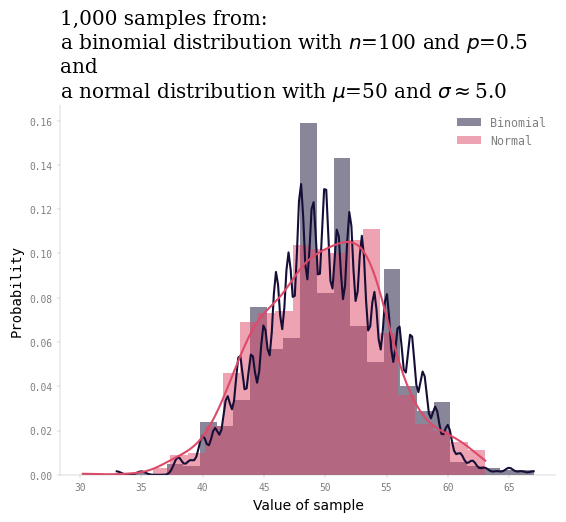

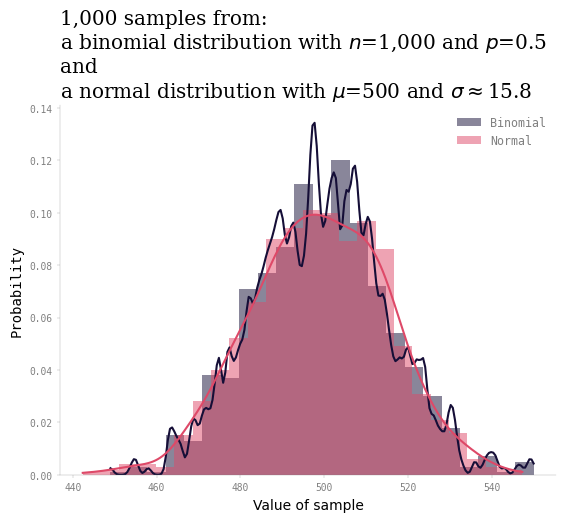

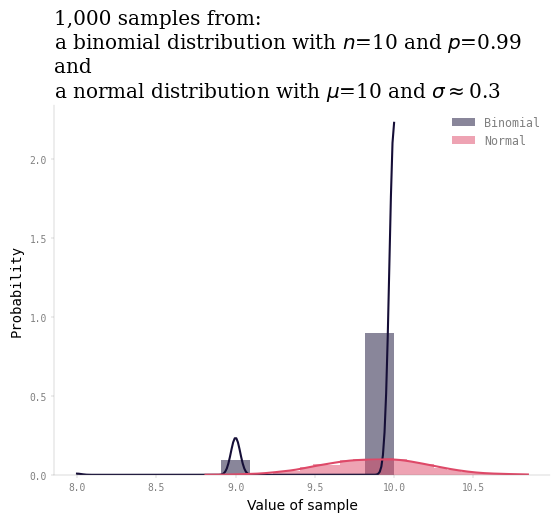

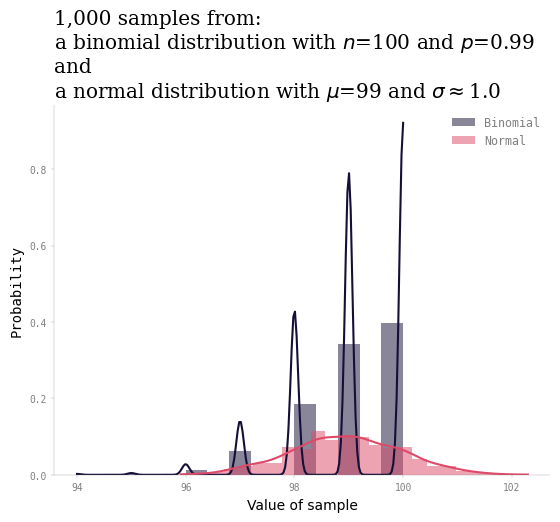

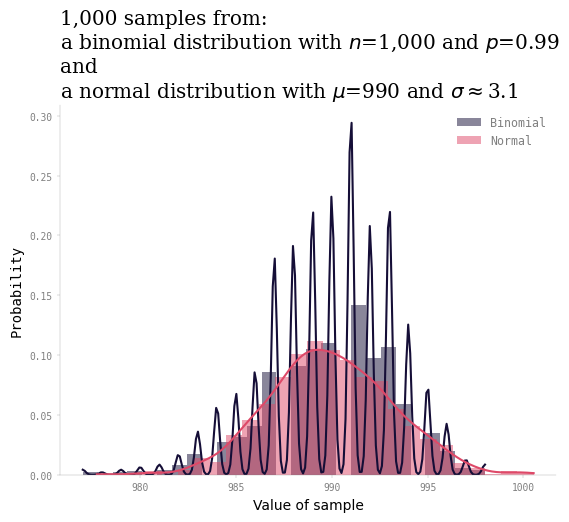

In [32]:
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
from configurations import logger

plt.style.use('my_mpl_stylesheet.mpltstyle')

logger.warning(
    'Seaborn does not seem to export a stub to help linters with type hints\n'
    'so I am explicitly disabling type hints on those lines.'
)

logger.warning(
    'Matplotlib.pylot does not seem to have types set up for linters.\n'
    'So I am explicitly disabling type hints on those lines.'
)

def choose_my_color(integer: int = 0) -> str:
    return (plt.rcParams["axes.prop_cycle"] # type: ignore
            .by_key()["color"][integer])

def plot_binomial_and_normal(
        n: int = 10,
        p: float = 0.5,
        size: int = 1_000,
        bw_adjust: float = 1
        ) -> None:
    my_binomial = np.random.binomial(n=n, p=p, size=size)

    ax = plt.subplots()[1] #type: ignore

    sns.histplot( # type: ignore
        my_binomial,
        ax=ax,
        stat='probability',
        kde=True,
        kde_kws={'bw_adjust' : bw_adjust},
        edgecolor='None',
        color=choose_my_color(0),
        label='Binomial'
        )

    loc = n * p
    scale = np.sqrt(n * p * (1 - p))

    my_normal = np.random.normal(loc=loc, scale=scale, size=size)

    sns.histplot( # type: ignore
        my_normal,
        ax=ax,
        stat='probability',
        kde=True,
        edgecolor='None',
        color=choose_my_color(5),
        label='Normal'
        )
    
    ax.legend() # type: ignore

    plt.title( # type: ignore
        label=f'{size:,} samples from:\n'
        'a binomial distribution with '
        fr'$n$={n:,} and $p$={p}'
        '\nand\n'
        'a normal distribution with '
        fr'$\mu$={loc:,.0f} and $\sigma\approx${scale:.1f}',
        family='serif'
        )

    plt.xlabel(xlabel='Value of sample', family='sans-serif') #type: ignore

probabilities_to_cycle_through = [0.01, 0.50, 0.99]
trials_and_bwadjusts_to_cycle_through = {
    10 : 0.375,
    100 : 0.275,
    1_000 : 0.175
    }

for probability in probabilities_to_cycle_through:
    for trial in trials_and_bwadjusts_to_cycle_through:
        plot_binomial_and_normal(
            p=probability,
            n=trial,
            bw_adjust=trials_and_bwadjusts_to_cycle_through[trial]
            )